#<b>AUTHOR: AAMIR P</b>

#<b>ORGANISATION: DEV INCEPT</b>

#<b>PROJECT : Railway Track Fault Detection</b>

In [20]:
import os
credentials = {"username":"aamirp","key":"f9b104e85dd7a74eab8a876f8d5b9536"}
os.environ['KAGGLE_USERNAME']=credentials["username"]
os.environ['KAGGLE_KEY']=credentials["key"]
!kaggle datasets download -d salmaneunus/railway-track-fault-detection
!unzip railway-track-fault-detection.zip

!kaggle datasets download -d madmaxliu/inceptionv3
!unzip inceptionv3.zip

100% 1.99G/2.00G [00:21<00:00, 25.2MB/s]
100% 2.00G/2.00G [00:21<00:00, 99.1MB/s]
Archive:  railway-track-fault-detection.zip
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201114_100159.jpg  
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201114_100209.jpg  
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201114_101124.jpg  
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201114_101200.jpg  
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201114_102203.jpg  
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201114_102222.jpg  
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201114_102819.jpg  
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201114_103110.jpg  
  inflating: Railway Track fault Detection Updated/Test/Defective/IMG_20201211_121712.jpg  
  inflating: Railway Track fault Detection Upd

**IMPORT LIBRARIES**

In [21]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

**Load Data**

In [23]:
train_dir = os.path.join('/content/Railway Track fault Detection Updated/Train')
validation_dir = os.path.join('/content/Railway Track fault Detection Updated/Validation')

# Directory with our training defective/nondefective pictures
train_defective_dir = os.path.join('/content/Railway Track fault Detection Updated/Train/Defective')
train_nondefective_dir = os.path.join('/content/Railway Track fault Detection Updated/Train/Non defective')

# Directory with our validation defective/nondefective pictures
validation_defective_dir = os.path.join('/content/Railway Track fault Detection Updated/Validation/Defective')
validation_nondefective_dir = os.path.join('/content/Railway Track fault Detection Updated/Validation/Non defective')

In [24]:
train_defective_fnames = os.listdir(train_defective_dir )
train_nondefective_fnames = os.listdir( train_nondefective_dir)

print(train_defective_fnames[:20])
print(train_nondefective_fnames[:20])

['131129946_140815574232570_8925999503657494497_n.jpg', 'IMG_20201114_102824.jpg', 'IMG_20201211_113650.jpg', 'IMG_20201114_101630.jpg', 'IMG_20201211_113506.jpg', 'download (5).jpeg', 'IMG_20201114_102009.jpg', 'IMG_20201114_100202.jpg', 'IMG_20201114_101835.jpg', 'IMG_20201114_101930.jpg', 'IMG_20201211_112807.jpg', 'IMG_20201114_102230.jpg', 'IMG_20201114_100226.jpg', 'IMG_20201114_101612.jpg', 'IMG_20201114_101938.jpg', 'IMG_20201114_100206.jpg', 'IMG_20201211_113324.jpg', 'IMG_20201211_112924.jpg', 'IMG_20201114_101157.jpg', 'IMG_20201114_101130.jpg']
['IMG_20201114_102649.jpg', 'IMG_20201114_100052.jpg', 'IMG_20201114_102839.jpg', 'IMG_20201114_100250.jpg', 'IMG_20201114_100808.jpg', 'IMG_20201114_103022.jpg', 'IMG_20201114_102309.jpg', 'IMG_20201114_101814.jpg', 'IMG_20201114_102051.jpg', 'IMG_20201114_100412.jpg', 'IMG_20201114_100853.jpg', 'IMG_20201114_100330.jpg', 'IMG_20201114_100303.jpg', 'IMG_20201114_102922.jpg', 'IMG_20201114_102311.jpg', 'IMG_20201114_101747.jpg', 'IMG

In [25]:
print('total training defective images :', len(os.listdir(train_defective_dir)))
print('total training non-defective images :', len(os.listdir(train_nondefective_dir)))


print('total validation defective images :', len(os.listdir( validation_defective_dir ) ))
print('total validation non-defective images :', len(os.listdir( validation_nondefective_dir) ))

total training defective images : 150
total training non-defective images : 150
total validation defective images : 31
total validation non-defective images : 31


In [26]:
# Parameters for our graph; we'll output images in a 10x10 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

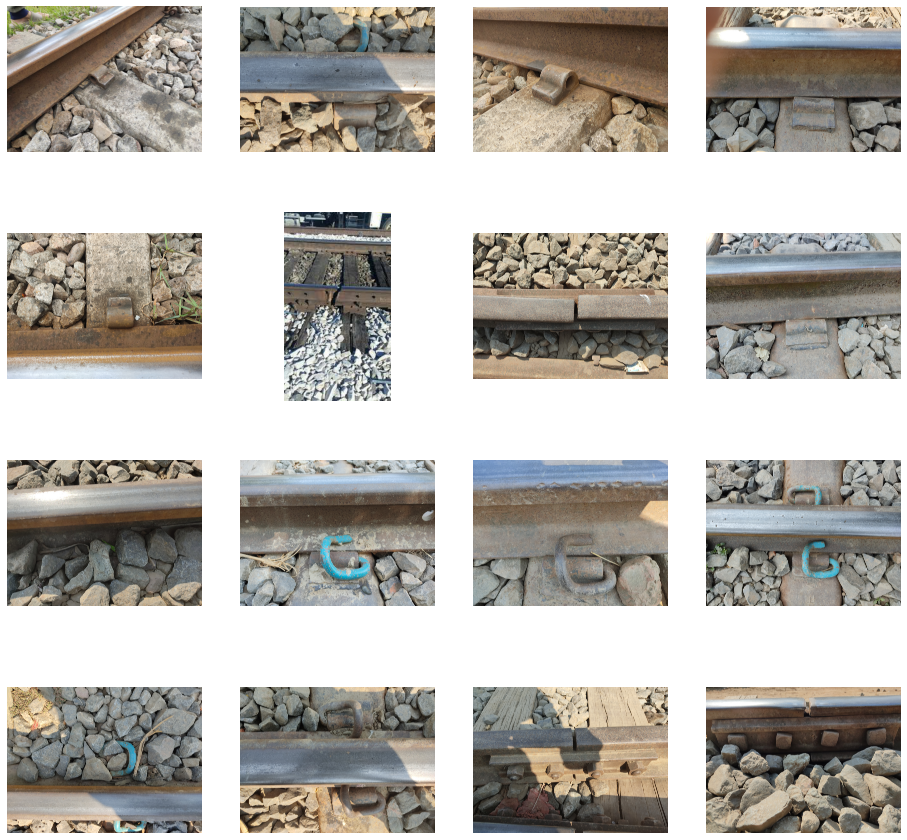

In [27]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_defective_pix = [os.path.join(train_defective_dir, fname) 
                for fname in train_defective_fnames[pic_index-8:pic_index]]
next_nondefective_pix = [os.path.join(train_nondefective_dir, fname) 
                for fname in train_nondefective_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_defective_pix+next_nondefective_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [28]:
local_weights_file = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


pre_trained_model = InceptionV3(input_shape = (300,300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

**DATA PREPROCESSING**

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300,300))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (300,300))

Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [30]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(32, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [32]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=25,                            
                              verbose=2)

Epoch 1/25
15/15 - 154s - loss: 1.3367 - accuracy: 0.6087 - val_loss: 0.6648 - val_accuracy: 0.6129
Epoch 2/25
15/15 - 145s - loss: 0.6226 - accuracy: 0.6622 - val_loss: 0.5710 - val_accuracy: 0.6774
Epoch 3/25
15/15 - 145s - loss: 0.5880 - accuracy: 0.6455 - val_loss: 0.4890 - val_accuracy: 0.7258
Epoch 4/25
15/15 - 145s - loss: 0.5223 - accuracy: 0.7592 - val_loss: 0.4708 - val_accuracy: 0.7903
Epoch 5/25
15/15 - 148s - loss: 0.4749 - accuracy: 0.7759 - val_loss: 0.3917 - val_accuracy: 0.8387
Epoch 6/25
15/15 - 145s - loss: 0.4732 - accuracy: 0.8227 - val_loss: 0.4921 - val_accuracy: 0.7581
Epoch 7/25
15/15 - 146s - loss: 0.4288 - accuracy: 0.7759 - val_loss: 0.3587 - val_accuracy: 0.8871
Epoch 8/25
15/15 - 147s - loss: 0.3677 - accuracy: 0.8227 - val_loss: 0.3536 - val_accuracy: 0.8387
Epoch 9/25
15/15 - 146s - loss: 0.4196 - accuracy: 0.7793 - val_loss: 0.3744 - val_accuracy: 0.7903
Epoch 10/25
15/15 - 146s - loss: 0.4057 - accuracy: 0.8227 - val_loss: 0.3419 - val_accuracy: 0.8710

In [33]:
model_save_name=model.save('mymodel.h5',history)
print('model save successfully')

model save successfully


Text(0.5, 1.0, 'Training and validation loss')

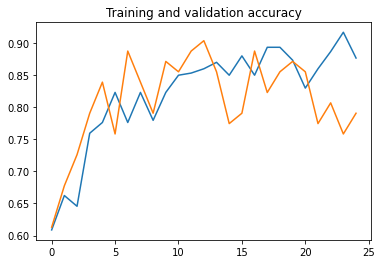

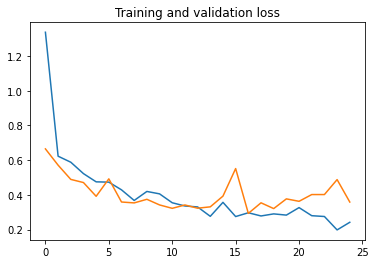

In [34]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'  )

[[0.]]
This Railway track has fault


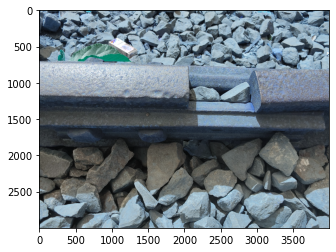

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/Railway Track fault Detection Updated/Test/Defective/IMG_20201114_102203.jpg')
plt.imshow(img)
img = cv2.resize(img,(300,300))
img = np.reshape(img,[1,300,300,3])

classes = model.predict(img)

print(classes)
if classes>0.5:
    print("This Railway track has no fault")
else:
    print("This Railway track has fault")

[[8.646464e-37]]
This Railway track has fault


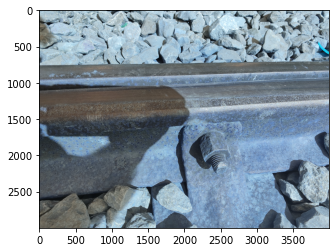

In [36]:
img = cv2.imread('/content/Railway Track fault Detection Updated/Test/Non defective/IMG_20201114_101907.jpg')
plt.imshow(img)
img = cv2.resize(img,(300,300))
img = np.reshape(img,[1,300,300,3])

classes = model.predict(img)

print(classes)
if classes>0.5:
    print("This Railway track has no fault")
else:
    print("This Railway track has fault")